In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPool1D, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import warnings

warnings.filterwarnings('ignore')
np.random.seed(0)
random_seed = 42


# Load data
train = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header=None)
test = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header=None)

# Balance dataset
df_balanced = [train[train[187]==0].sample(n=20000, random_state=42)]
df_balanced += [resample(train[train[187]==i], replace=True, n_samples=20000, random_state=random_seed+i) for i in range(1, 5)]
train = pd.concat(df_balanced)

# Split features and labels
X_train, y_train = train.iloc[:, :187], train[187]
X_test, y_test = test.iloc[:, :187], test[187]

# Normalize
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

#  model
model = Sequential([
    Input(shape=(X_train_norm.shape[1], 1)),
    Conv1D(128, 11, activation='relu', padding='Same'),
    MaxPool1D(3, 2, padding='same'),
    Conv1D(64, 3, activation='relu', padding='Same'),
    MaxPool1D(3, 2, padding='same'),
    Conv1D(64, 3, activation='relu', padding='Same'),
    MaxPool1D(3, 2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='linear')
])

model.summary()


model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True))

# Train
model.fit(X_train_norm, y_train, epochs=16, batch_size=32)

# Evaluattionnn
for X, y, name in [(X_test_norm, y_test, 'Test'), (X_train_norm, y_train, 'Train')]:
    y_pred = tf.nn.softmax(model.predict(X)).numpy().argmax(axis=1)
    acc = round((y_pred == y).sum() / y.shape[0] * 100, 2)
    print(f'{name} set accuracy is {acc}%')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 187, 128)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 94, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 94, 64)         │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 47, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        98,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,306 (544.16 KB)

 Trainable params: 139,306 (544.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.4051
Epoch 2/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0953
Epoch 3/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0614
Epoch 4/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0454
Epoch 5/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0337
Epoch 6/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0292
Epoch 7/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0272
Epoch 8/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0220
Epoch 9/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0198
Epoch 10/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0188
Epoch 11/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0167
Epoch 12/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0190
Epoch 13/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0151
Epoch 14/16
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0164
Epoch 15/16
3125/3125 ━━━━━━

685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Test set accuracy: 97.38%

Test Classification Report:
              precision    recall  f1-score   support

         0.0     0.9933    0.9787    0.9860     18118
         1.0     0.6375    0.8507    0.7288       556
         2.0     0.9308    0.9565    0.9435      1448
         3.0     0.7035    0.8642    0.7756       162
         4.0     0.9857    0.9882    0.9870      1608

    accuracy                         0.9738     21892
   macro avg     0.8502    0.9277    0.8842     21892
weighted avg     0.9775    0.9738    0.9751     21892



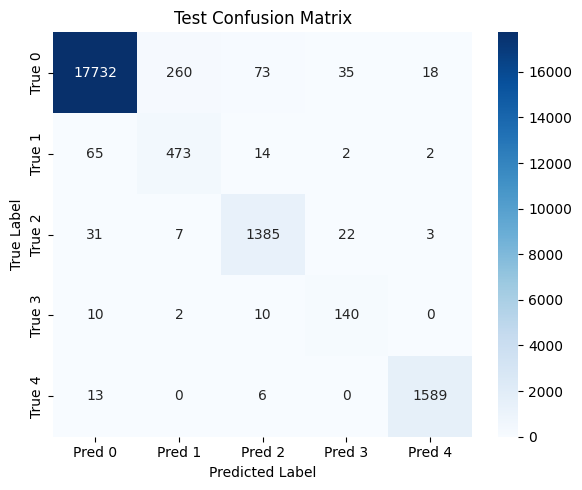

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step

Train set accuracy: 99.8%

Train Classification Report:
              precision    recall  f1-score   support

         0.0     0.9974    0.9951    0.9963     20000
         1.0     0.9964    0.9982    0.9973     20000
         2.0     0.9989    0.9973    0.9981     20000
         3.0     0.9973    1.0000    0.9987     20000
         4.0     0.9999    0.9994    0.9996     20000

    accuracy                         0.9980    100000
   macro avg     0.9980    0.9980    0.9980    100000
weighted avg     0.9980    0.9980    0.9980    100000



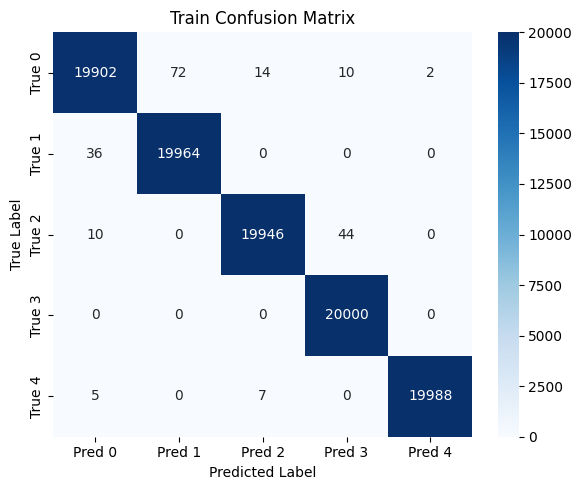

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
def evaluate_model(X, y, name):
    y_logits = model.predict(X)
    y_pred = tf.nn.softmax(y_logits).numpy().argmax(axis=1)

    # Accuracy
    acc = round((y_pred == y).sum() / y.shape[0] * 100, 2)
    print(f'\n{name} set accuracy: {acc}%')

    # Classification Report
    print(f'\n{name} Classification Report:')
    print(classification_report(y, y_pred, digits=4))
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=[f'Pred {i}' for i in range(cm.shape[0])],
        yticklabels=[f'True {i}' for i in range(cm.shape[0])]
    )
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

evaluate_model(X_test_norm, y_test, 'Test')
evaluate_model(X_train_norm, y_train, 'Train')
